In [1]:
reset()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  (), please run `%reset?` for details


In [3]:
# Import libraries 
import pandas as pd
import numpy as np
import pyodbc 
import os 
from tqdm import tqdm 
import sys
import time

In [6]:
# Establish connection to SQL Server
conn = pyodbc.connect('Driver={SQL Server};'
                       'Server=esmz08srdb029.imptobnet.com;'
                       'Database=ITE_PRD;'
                       'Trusted_Connection=yes;')

In [4]:
OUTPUT = '../02_Data/01_TT_Sales_Direct_and_Invest_10d_by_brand.csv'

In [12]:
t1 = time.time()

In [7]:
# Open SQL query file 
sql = open('../01_TT_Sales_Direct_and_Invest_10d_by_brand.sql', 'r').read()
cursor = conn.cursor()

In [14]:
# Generate chunks for batch reading avoiding out of memory
chunksize = 200000
generator = pd.read_sql(sql,conn, chunksize=chunksize)
     
begin = True
for chunk in tqdm(generator):
    if begin:
        chunk.to_csv(OUTPUT, sep='|', index=False, mode='w')
        begin = False
    else:
        chunk.to_csv(OUTPUT, sep='|', index=False, mode='a', header=False)

t2 = time.time()
#print ("Time to execute script:",str(t2-t1))


0it [00:00, ?it/s]
1it [02:41, 161.36s/it]
2it [05:06, 156.45s/it]
3it [07:56, 160.52s/it]
4it [10:52, 165.22s/it]
5it [13:49, 168.60s/it]
6it [16:46, 171.26s/it]
7it [19:39, 171.88s/it]
8it [22:29, 171.35s/it]
9it [25:30, 174.00s/it]
10it [28:36, 177.69s/it]
11it [31:57, 184.82s/it]
12it [35:06, 186.00s/it]
13it [38:32, 191.81s/it]
14it [42:20, 202.69s/it]
15it [45:33, 199.78s/it]
16it [48:59, 201.77s/it]
17it [52:10, 198.60s/it]
18it [55:37, 200.93s/it]
19it [58:57, 200.73s/it]
20it [1:02:00, 195.31s/it]
21it [1:05:08, 193.12s/it]
22it [1:08:31, 196.20s/it]
23it [1:11:54, 198.13s/it]
24it [1:15:14, 198.85s/it]
25it [1:18:40, 200.94s/it]
26it [1:22:45, 214.13s/it]
27it [1:26:27, 216.58s/it]
28it [1:30:25, 223.03s/it]
29it [1:34:23, 227.38s/it]
30it [1:38:29, 233.20s/it]
31it [1:42:40, 238.32s/it]
32it [1:46:53, 242.80s/it]
33it [1:50:57, 243.07s/it]
34it [1:51:48, 197.31s/it]


In [15]:
print ("Time to execute script:",str(round((t2-t1)/3600,2)), "h")

Time to execute script: 1.86 h


In [5]:
dataset = pd.read_csv(OUTPUT,sep='|') 


# Exploratory data analysis

In [5]:
dataset.columns

Index(['CUSTOMER_ID', 'BRANDFAMILY_ID', 'tercio', 'NUM_SELLING_DAYS',
       'NUM_DAYS', 'days_btw_order', 'num_orders', 'DATE_init', 'DATE_end',
       'SI_ITG_WSE', 'SI_MRKT_WSE', 'SO_ITG_WSE', 'SO_MRKT_WSE',
       'QUOTA_SELLIN', 'QUOTA_SELLOUT', 'MECHERO', 'CLIPPER', 'ABP',
       'DISPENSADOR', 'VISIBILIDAD', 'AZAFATA', 'TOTEM', 'SVM', 'TFT', 'CUE',
       'VISIT', 'PERC_MECHERO', 'PERC_CLIPPER', 'PERC_ABP', 'PERC_DISPENSADOR',
       'PERC_VISIBILIDAD', 'PERC_AZAFATA', 'PERC_TOTEM', 'PERC_SVM',
       'PERC_TFT', 'PERC_CUE', 'PERC_visit'],
      dtype='object')

In [6]:
pd.options.display.width = 0
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Checking the types of data

In [7]:
dataset.head()

,CUSTOMER_ID,BRANDFAMILY_ID,tercio,NUM_SELLING_DAYS,NUM_DAYS,days_btw_order,num_orders,DATE_init,DATE_end,SI_ITG_WSE,SI_MRKT_WSE,SO_ITG_WSE,SO_MRKT_WSE,QUOTA_SELLIN,QUOTA_SELLOUT,MECHERO,CLIPPER,ABP,DISPENSADOR,VISIBILIDAD,AZAFATA,TOTEM,SVM,TFT,CUE,VISIT,PERC_MECHERO,PERC_CLIPPER,PERC_ABP,PERC_DISPENSADOR,PERC_VISIBILIDAD,PERC_AZAFATA,PERC_TOTEM,PERC_SVM,PERC_TFT,PERC_CUE,PERC_visit
0,27140342,BF234103,2,6,10,54.0,1.0,2020-12-11,2020-12-20,600.0,40800.0,160.0,19660.0,0.014706,0.008138,0,0,0,0,0,0,0,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,8060782,BF231021,3,7,9,6.0,2.0,2019-01-23,2019-01-31,3032.0,129824.0,1472.0,162011.0,0.023355,0.009085,0,0,0,0,0,0,0,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,32000077,BF231021,1,7,10,1.0,3.0,2018-04-01,2018-04-10,1000.0,126192.0,640.0,155774.0,0.007924,0.004108,0,0,0,0,0,0,0,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,36160190,BF234103,2,7,11,6.0,1.0,2021-08-12,2021-08-22,1000.0,35800.0,1360.0,127517.0,0.027933,0.010665,0,0,0,0,0,0,0,0,11,0,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.090909
4,21000799,BF241151,3,7,9,9.0,1.0,2018-08-23,2018-08-31,200.0,12656.0,120.0,161798.0,0.015803,0.000741,0,1,0,0,0,0,0,0,0,0,0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6638120 entries, 0 to 6638119
Data columns (total 37 columns):
CUSTOMER_ID         int64
BRANDFAMILY_ID      object
tercio              int64
NUM_SELLING_DAYS    int64
NUM_DAYS            int64
days_btw_order      float64
num_orders          float64
DATE_init           object
DATE_end            object
SI_ITG_WSE          float64
SI_MRKT_WSE         float64
SO_ITG_WSE          float64
SO_MRKT_WSE         float64
QUOTA_SELLIN        float64
QUOTA_SELLOUT       float64
MECHERO             int64
CLIPPER             int64
ABP                 int64
DISPENSADOR         int64
VISIBILIDAD         int64
AZAFATA             int64
TOTEM               int64
SVM                 int64
TFT                 int64
CUE                 int64
VISIT               int64
PERC_MECHERO        float64
PERC_CLIPPER        float64
PERC_ABP            float64
PERC_DISPENSADOR    float64
PERC_VISIBILIDAD    float64
PERC_AZAFATA        float64
PERC_TOTEM          floa

### Edit & Drop columns 

In [7]:
dataset.CUSTOMER_ID = dataset.CUSTOMER_ID.astype(str)


### Data Shape & Description

In [10]:
dataset.shape

(6638120, 37)

In [11]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dataset.describe()

,tercio,NUM_SELLING_DAYS,NUM_DAYS,days_btw_order,num_orders,SI_ITG_WSE,SI_MRKT_WSE,SO_ITG_WSE,SO_MRKT_WSE,QUOTA_SELLIN,QUOTA_SELLOUT,MECHERO,CLIPPER,ABP,DISPENSADOR,VISIBILIDAD,AZAFATA,TOTEM,SVM,TFT,CUE,VISIT,PERC_MECHERO,PERC_CLIPPER,PERC_ABP,PERC_DISPENSADOR,PERC_VISIBILIDAD,PERC_AZAFATA,PERC_TOTEM,PERC_SVM,PERC_TFT,PERC_CUE,PERC_visit
count,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00
mean,2.00,6.88,10.14,20.03,1.29,7046.29,63831.59,5937.08,105127.69,0.12,0.06,0.93,0.88,0.36,0.10,0.32,0.03,0.10,1.20,2.07,0.06,0.43,0.09,0.09,0.04,0.01,0.03,0.00,0.01,0.12,0.20,0.01,0.04
std,0.82,0.62,1.40,31.15,0.97,13886.99,80764.41,10578.33,105570.59,0.14,0.07,2.60,2.45,1.75,0.72,2.10,0.20,1.06,4.24,5.86,0.74,0.61,0.26,0.24,0.17,0.07,0.22,0.02,0.11,0.41,0.57,0.07,0.06
min,1.00,5.00,7.00,1.00,0.00,-32888.00,-32888.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,7.00,9.00,5.00,1.00,800.00,16000.00,1000.00,46085.00,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2.00,7.00,10.00,9.00,1.00,2836.00,40504.00,2680.00,84036.00,0.07,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,3.00,7.00,11.00,12.00,2.00,7404.00,87936.00,6534.00,137331.00,0.19,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09
max,3.00,8.00,13.00,1504.00,9.00,2825636.00,10672016.00,1210389.00,11223122.00,1.00,1.00,176.00,65.00,283.00,59.00,111.00,12.00,45.00,96.00,160.00,13.00,7.00,17.30,5.80,24.73,5.90,11.10,1.20,5.00,8.00,16.00,1.00,0.67


### Duplicate, missing

In [12]:
dataset.shape
# Rows containing duplicate data
duplicate_rows_df = dataset[dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 37)


In [13]:
# Finding the null values.
print(dataset.isnull().sum())

CUSTOMER_ID         0
BRANDFAMILY_ID      0
tercio              0
NUM_SELLING_DAYS    0
NUM_DAYS            0
days_btw_order      0
num_orders          0
DATE_init           0
DATE_end            0
SI_ITG_WSE          0
SI_MRKT_WSE         0
SO_ITG_WSE          0
SO_MRKT_WSE         0
QUOTA_SELLIN        0
QUOTA_SELLOUT       0
MECHERO             0
CLIPPER             0
ABP                 0
DISPENSADOR         0
VISIBILIDAD         0
AZAFATA             0
TOTEM               0
SVM                 0
TFT                 0
CUE                 0
VISIT               0
PERC_MECHERO        0
PERC_CLIPPER        0
PERC_ABP            0
PERC_DISPENSADOR    0
PERC_VISIBILIDAD    0
PERC_AZAFATA        0
PERC_TOTEM          0
PERC_SVM            0
PERC_TFT            0
PERC_CUE            0
PERC_visit          0
dtype: int64


### Dependent Variables

In [8]:
feats_to_explore=['tercio', 'NUM_SELLING_DAYS', 'NUM_DAYS', 'days_btw_order', 'num_orders', 'SI_ITG_WSE', 'SI_MRKT_WSE','QUOTA_SELLIN', 'MECHERO', 'CLIPPER', 'ABP', 'DISPENSADOR', 'VISIBILIDAD', 'AZAFATA', 'TOTEM', 'SVM', 'TFT', 'CUE', 'VISIT', 'PERC_MECHERO', 'PERC_CLIPPER', 'PERC_ABP', 'PERC_DISPENSADOR', 'PERC_VISIBILIDAD', 'PERC_AZAFATA', 'PERC_TOTEM', 'PERC_SVM', 'PERC_TFT', 'PERC_CUE', 'PERC_visit']
cat_Feat=['CUSTOMER_ID', 'BRANDFAMILY_ID', 'DATE_init', 'DATE_end', 'SO_ITG_WSE', 'SO_MRKT_WSE', 'QUOTA_SELLOUT']

In [15]:
corr = dataset.corr()
corr

,tercio,NUM_SELLING_DAYS,NUM_DAYS,days_btw_order,num_orders,SI_ITG_WSE,SI_MRKT_WSE,SO_ITG_WSE,SO_MRKT_WSE,QUOTA_SELLIN,QUOTA_SELLOUT,MECHERO,CLIPPER,ABP,DISPENSADOR,VISIBILIDAD,AZAFATA,TOTEM,SVM,TFT,CUE,VISIT,PERC_MECHERO,PERC_CLIPPER,PERC_ABP,PERC_DISPENSADOR,PERC_VISIBILIDAD,PERC_AZAFATA,PERC_TOTEM,PERC_SVM,PERC_TFT,PERC_CUE,PERC_visit
tercio,1.00,-0.53,-0.56,0.03,-0.07,-0.02,-0.03,-0.02,-0.04,-0.00,0.00,-0.02,-0.01,0.01,0.00,0.07,-0.02,0.03,-0.02,-0.03,-0.00,-0.08,0.01,0.01,0.03,0.01,0.08,-0.00,0.04,0.00,0.00,0.00,-0.02
NUM_SELLING_DAYS,-0.53,1.00,0.34,-0.09,0.09,0.03,0.06,0.03,0.05,0.01,-0.01,-0.02,0.03,0.01,-0.00,-0.05,0.02,-0.00,0.01,0.02,-0.01,0.07,-0.04,0.01,0.00,-0.01,-0.05,0.01,-0.01,0.00,0.00,-0.01,0.03
NUM_DAYS,-0.56,0.34,1.00,-0.03,0.08,0.02,0.04,0.06,0.10,-0.00,-0.00,0.01,0.02,-0.00,-0.01,-0.03,0.01,-0.02,0.04,0.05,0.01,0.01,-0.04,-0.02,-0.03,-0.03,-0.05,-0.01,-0.03,-0.00,-0.00,0.00,-0.08
days_btw_order,0.03,-0.09,-0.03,1.00,-0.56,-0.22,-0.25,-0.19,-0.19,-0.33,-0.14,-0.13,-0.11,-0.08,-0.04,-0.04,-0.05,-0.03,-0.08,-0.08,-0.01,-0.11,-0.13,-0.11,-0.08,-0.04,-0.04,-0.05,-0.03,-0.08,-0.08,-0.01,-0.11
num_orders,-0.07,0.09,0.08,-0.56,1.00,0.26,0.31,0.23,0.21,0.16,0.13,0.09,0.01,0.05,0.03,0.02,0.06,0.03,0.08,0.06,0.02,0.10,0.08,0.01,0.05,0.03,0.02,0.05,0.03,0.08,0.06,0.02,0.09
SI_ITG_WSE,-0.02,0.03,0.02,-0.22,0.26,1.00,0.54,0.89,0.41,0.42,0.53,0.37,0.12,0.25,0.11,0.11,0.20,0.11,0.20,0.19,0.02,0.12,0.36,0.12,0.25,0.11,0.11,0.20,0.11,0.20,0.19,0.02,0.11
SI_MRKT_WSE,-0.03,0.06,0.04,-0.25,0.31,0.54,1.00,0.48,0.72,-0.08,0.09,0.22,-0.05,0.15,0.05,0.05,0.11,0.06,0.06,0.05,0.02,0.16,0.21,-0.05,0.14,0.04,0.05,0.11,0.06,0.05,0.05,0.02,0.15
SO_ITG_WSE,-0.02,0.03,0.06,-0.19,0.23,0.89,0.48,1.00,0.47,0.39,0.58,0.36,0.12,0.24,0.11,0.12,0.21,0.11,0.20,0.20,0.02,0.12,0.35,0.12,0.24,0.11,0.12,0.21,0.11,0.20,0.20,0.02,0.11
SO_MRKT_WSE,-0.04,0.05,0.10,-0.19,0.21,0.41,0.72,0.47,1.00,0.00,-0.04,0.12,0.17,0.16,0.03,0.04,0.14,0.05,0.14,0.14,0.04,0.21,0.12,0.16,0.15,0.03,0.03,0.13,0.05,0.13,0.13,0.03,0.19
QUOTA_SELLIN,-0.00,0.01,-0.00,-0.33,0.16,0.42,-0.08,0.39,0.00,1.00,0.56,0.17,0.21,0.15,0.08,0.07,0.08,0.05,0.17,0.18,-0.00,0.02,0.17,0.21,0.15,0.08,0.07,0.08,0.05,0.17,0.19,0.00,0.02


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
#seaborn para gráficos
import seaborn as sns

In [10]:
Corr_feats = ['QUOTA_SELLOUT']
Corr_feats.extend(feats_to_explore)
corrF=dataset[Corr_feats].corr()

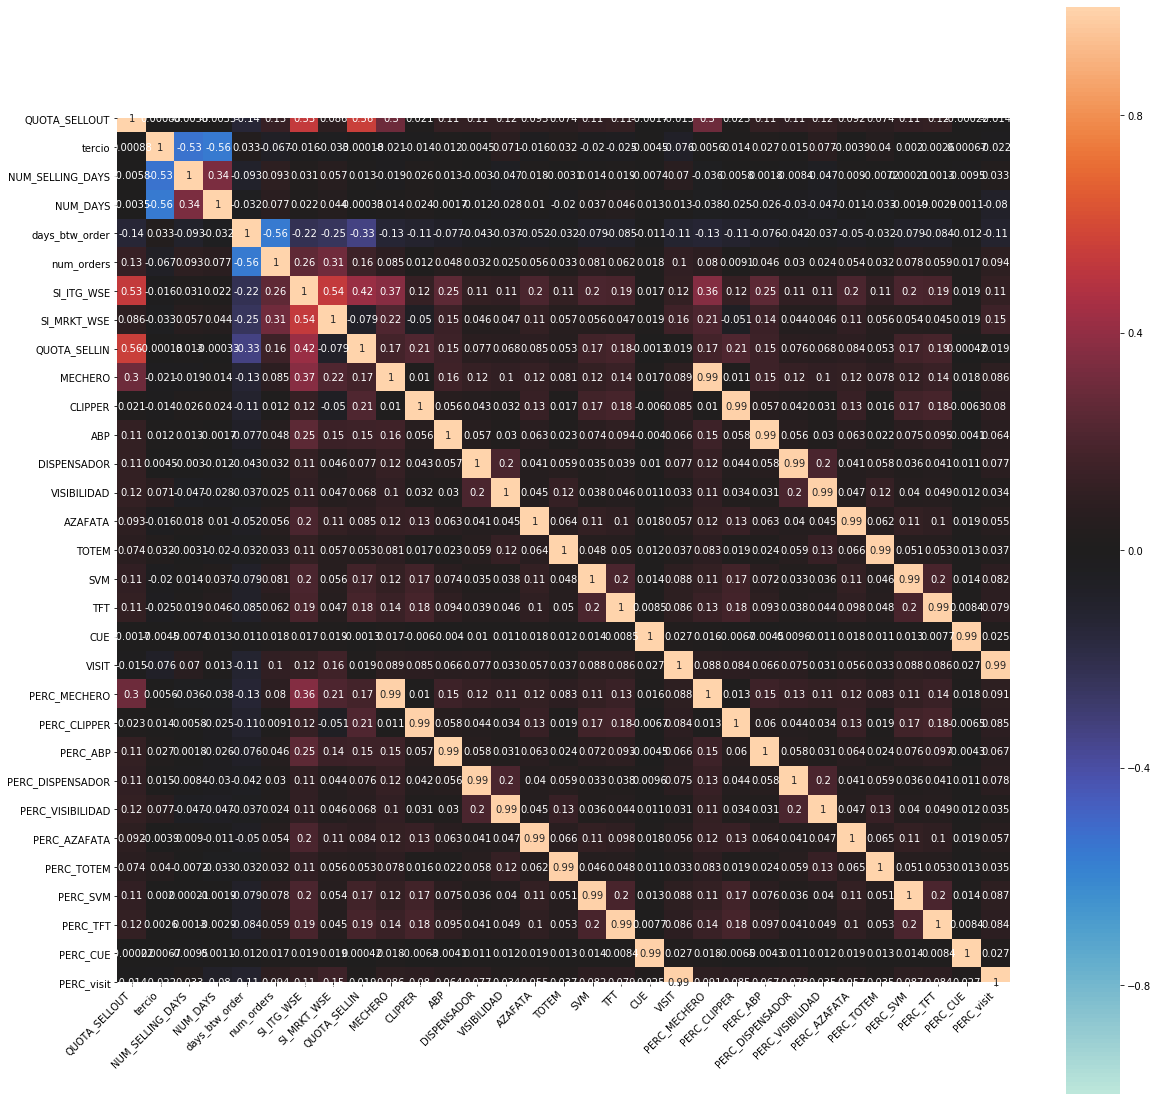

In [18]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(
    corrF, annot=True,
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [11]:
feats_to_explore=['tercio', 'NUM_SELLING_DAYS', 'NUM_DAYS', 'days_btw_order', 'num_orders', 'SI_ITG_WSE', 'SI_MRKT_WSE','QUOTA_SELLIN', 'PERC_MECHERO', 'PERC_CLIPPER', 'PERC_ABP', 'PERC_DISPENSADOR', 'PERC_VISIBILIDAD', 'PERC_AZAFATA', 'PERC_TOTEM', 'PERC_SVM', 'PERC_TFT', 'PERC_CUE', 'PERC_visit']

In [20]:
Corr_feats = ['QUOTA_SELLOUT']
Corr_feats.extend(feats_to_explore)
corrF=dataset[Corr_feats].corr()

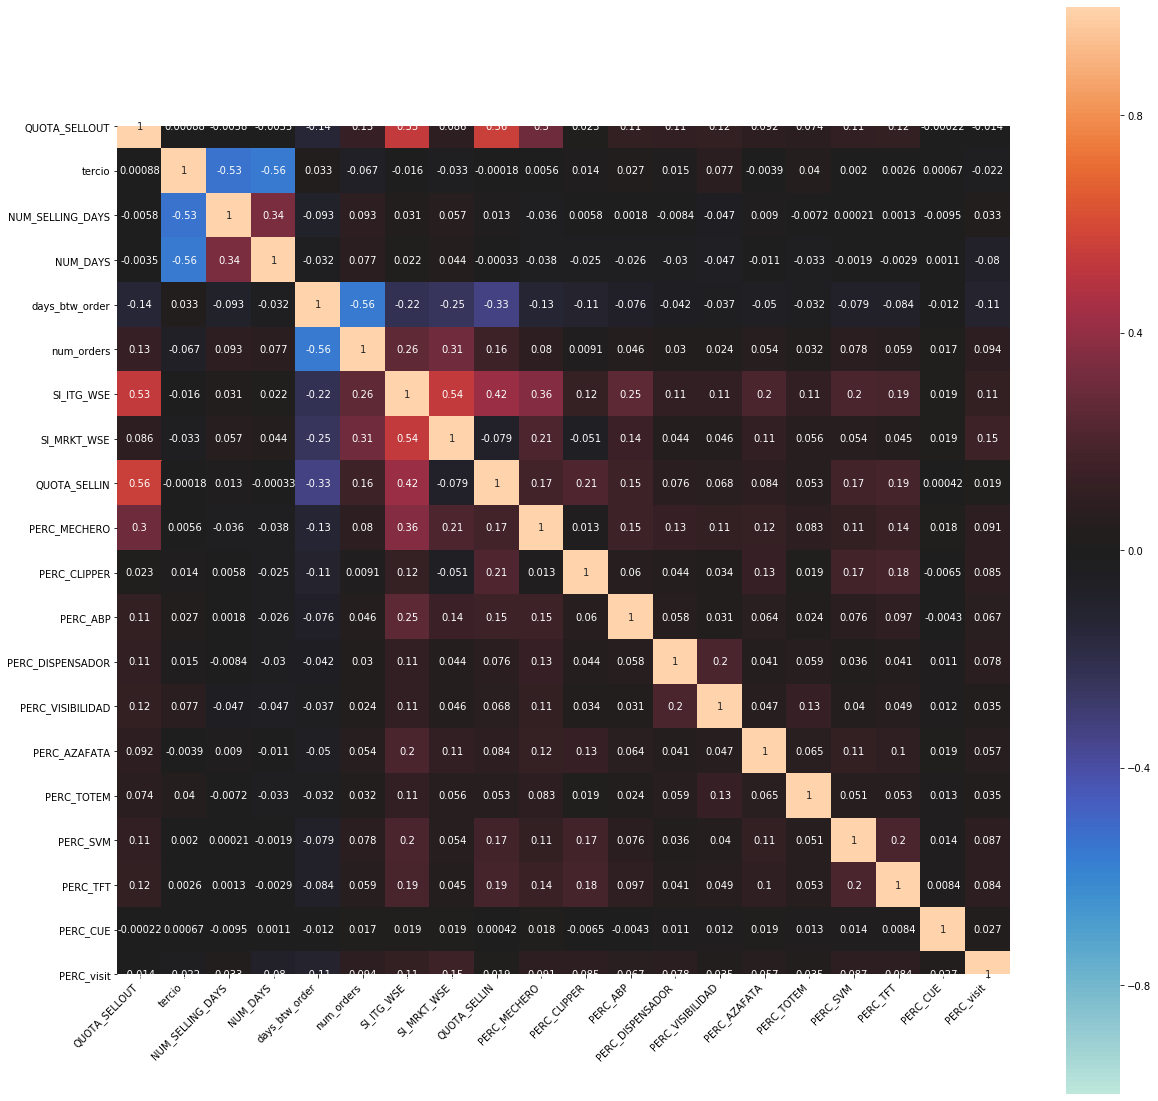

In [21]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(
    corrF, annot=True,
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Outliers

In [22]:
len(feats_to_explore)

19

In [23]:
dataset[feats_to_explore].describe()

,tercio,NUM_SELLING_DAYS,NUM_DAYS,days_btw_order,num_orders,SI_ITG_WSE,SI_MRKT_WSE,QUOTA_SELLIN,PERC_MECHERO,PERC_CLIPPER,PERC_ABP,PERC_DISPENSADOR,PERC_VISIBILIDAD,PERC_AZAFATA,PERC_TOTEM,PERC_SVM,PERC_TFT,PERC_CUE,PERC_visit
count,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00,6638120.00
mean,2.00,6.88,10.14,20.03,1.29,7046.29,63831.59,0.12,0.09,0.09,0.04,0.01,0.03,0.00,0.01,0.12,0.20,0.01,0.04
std,0.82,0.62,1.40,31.15,0.97,13886.99,80764.41,0.14,0.26,0.24,0.17,0.07,0.22,0.02,0.11,0.41,0.57,0.07,0.06
min,1.00,5.00,7.00,1.00,0.00,-32888.00,-32888.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,7.00,9.00,5.00,1.00,800.00,16000.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2.00,7.00,10.00,9.00,1.00,2836.00,40504.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,3.00,7.00,11.00,12.00,2.00,7404.00,87936.00,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09
max,3.00,8.00,13.00,1504.00,9.00,2825636.00,10672016.00,1.00,17.30,5.80,24.73,5.90,11.10,1.20,5.00,8.00,16.00,1.00,0.67


In [12]:
Anfeat=['SI_ITG_WSE','SI_MRKT_WSE','QUOTA_SELLIN']

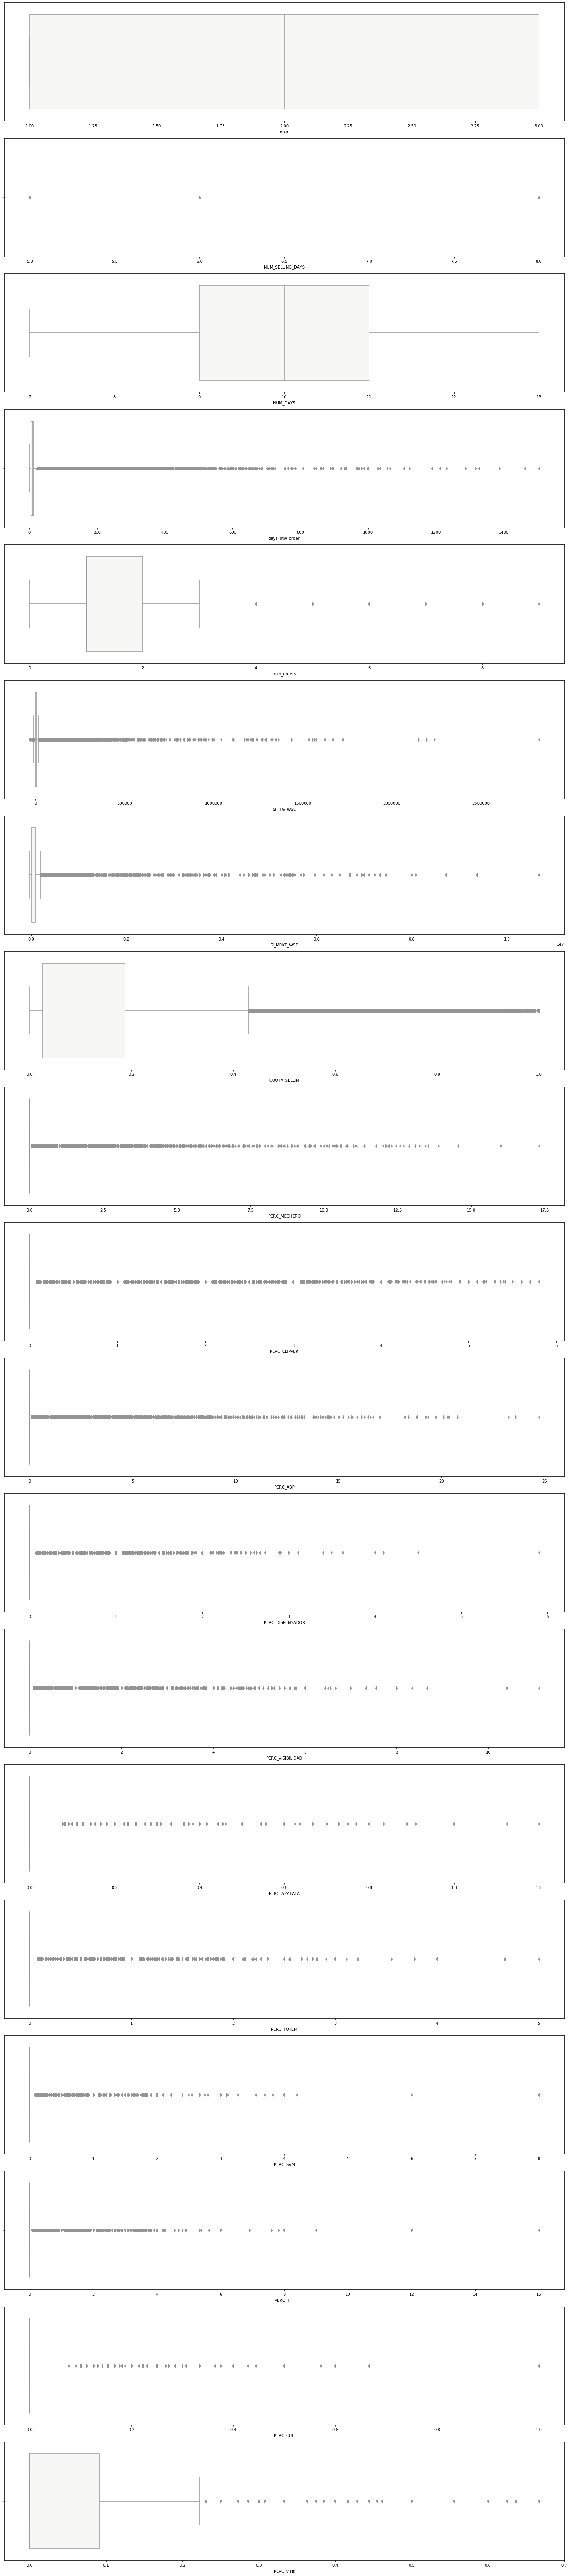

In [25]:
plt.figure(figsize=(20,90))
for i, feature in enumerate(feats_to_explore):
    plt.subplot(len(feats_to_explore), 1, i+1)
    sns.boxplot(x=feature, data=dataset, palette= "PiYG")

plt.tight_layout()
plt.show()

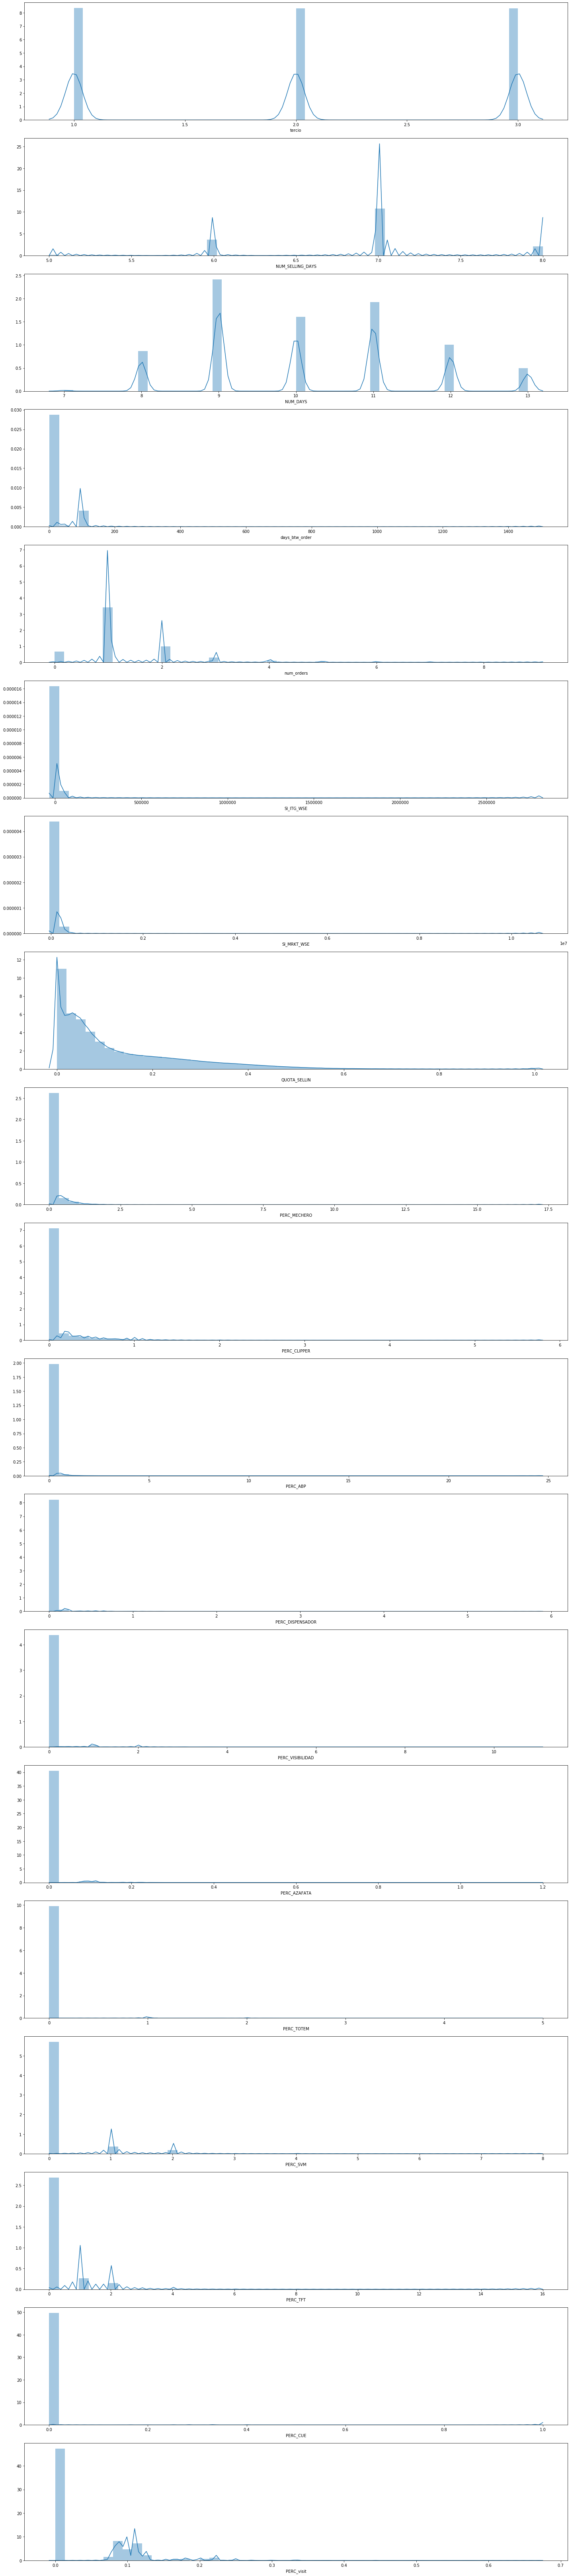

In [26]:

plt.figure(figsize=(12,8))
for i, feature in enumerate(feats_to_explore):    
    plt.subplot(len(feats_to_explore), 1, i+1)    
    #sns.distplot(x=feature, data=dataset, palette= "PiYG")
    sns.distplot(dataset[feature], bins=bins)
plt.tight_layout()
plt.show()

In [27]:
# Getting unique customers
customers = dataset['CUSTOMER_ID'].drop_duplicates().reset_index(drop=True)

In [28]:
customers

0       27140342
1        8060782
2       32000077
3       36160190
4       21000799
          ...   
6851    15171754
6852     1001320
6853    25010349
6854     3060043
6855    39120464
Name: CUSTOMER_ID, Length: 6856, dtype: object

In [29]:
# Shuffle customers
np.random.seed(0)
index = np.random.permutation(len(customers))
customers = customers.loc[index].reset_index(drop=True)

In [30]:
# Select random Sample
ratio = 1-0.001
Sample = customers[int(np.round(len(customers)*ratio)):]

In [31]:
Sample

6849     5010061
6850    18000703
6851    41060039
6852    24020885
6853     8060659
6854    31001779
6855     8010027
Name: CUSTOMER_ID, dtype: object

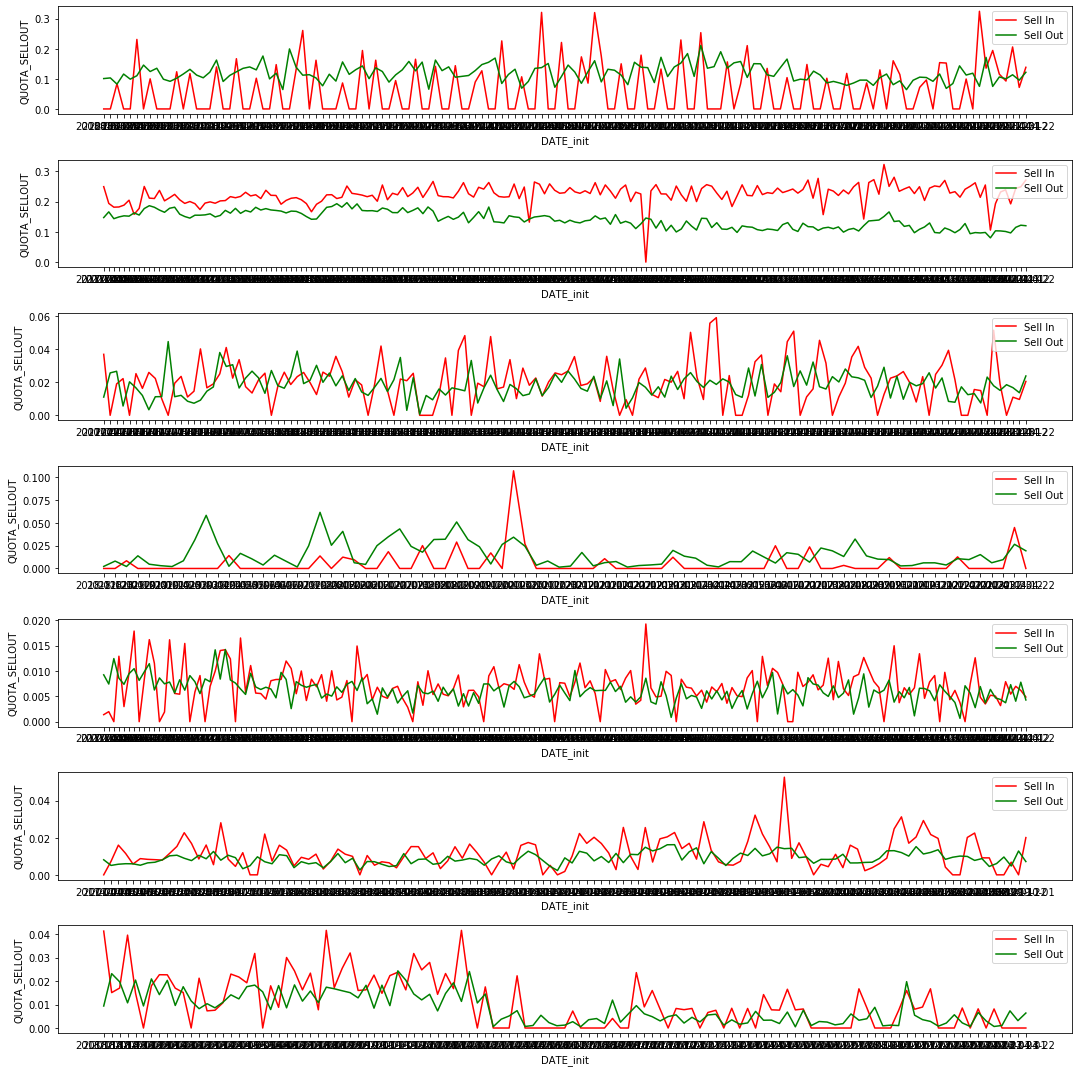

In [33]:
plt.figure(figsize=(15,15))
i=0
itera=Sample.count()
for  cust in Sample:
    
    df = dataset.loc[(dataset.CUSTOMER_ID == cust) & (dataset.BRANDFAMILY_ID == "BF231021")]
    
    X=df['DATE_init']
    Y=df['QUOTA_SELLIN']
    Z=df['QUOTA_SELLOUT']
    
    plt.subplot(itera, 1, i+1)
    
    sns.lineplot(x=X, y=Y, color='red', label='Sell In')
    sns.lineplot(x=X, y=Z, color='green', label='Sell Out')
    plt.legend(loc='upper right')
    i=i+1
plt.tight_layout()
plt.show()

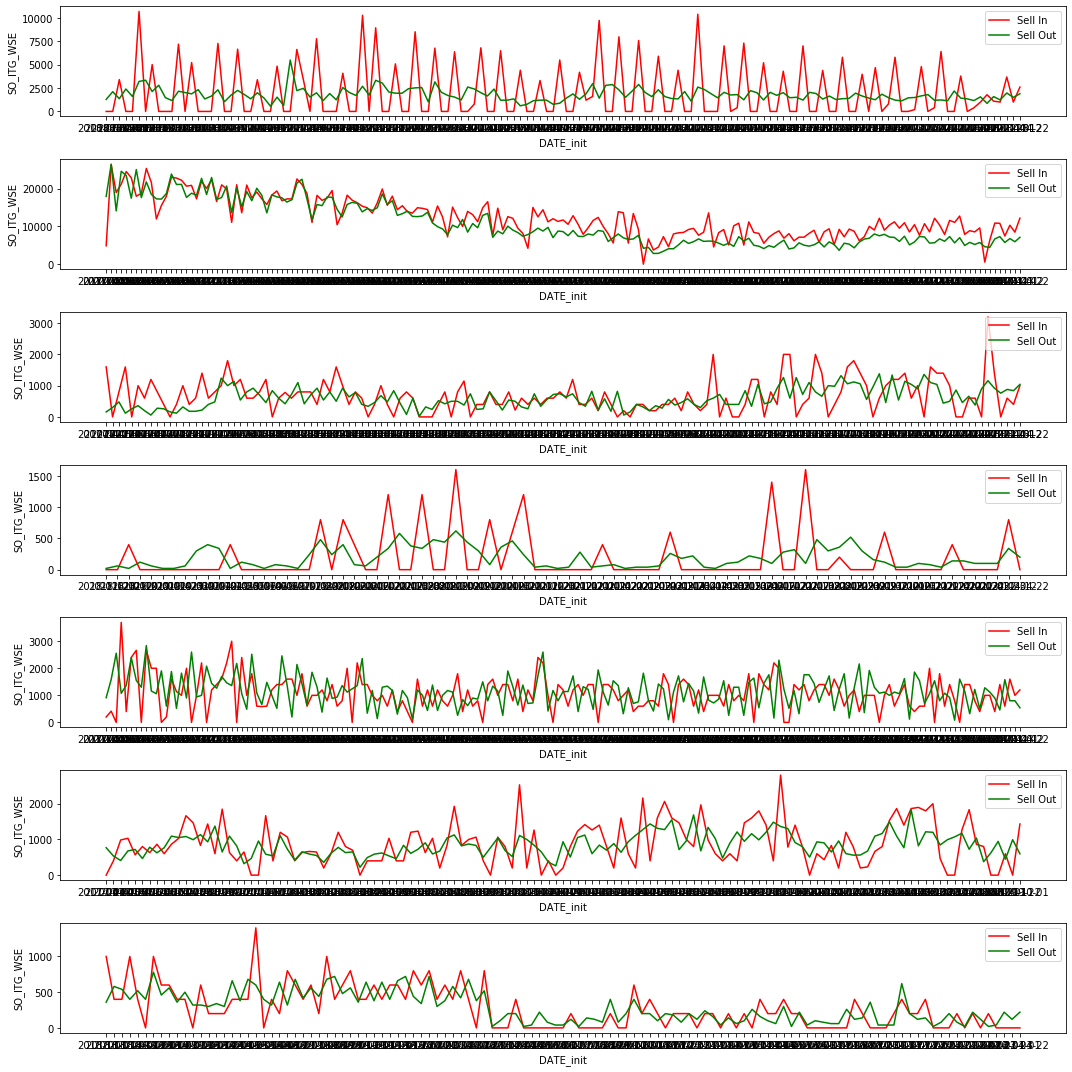

In [37]:
plt.figure(figsize=(15,15))
i=0
itera=Sample.count()
for  cust in Sample:
    
    df = dataset.loc[(dataset.CUSTOMER_ID == cust) & (dataset.BRANDFAMILY_ID == "BF231021")]
    
    X=df['DATE_init']
    Y=df['SI_ITG_WSE']
    Z=df['SO_ITG_WSE']
    
    plt.subplot(itera, 1, i+1)
    
    sns.lineplot(x=X, y=Y, color='red', label='Sell In')
    sns.lineplot(x=X, y=Z, color='green', label='Sell Out')
    plt.legend(loc='upper right')
    i=i+1
plt.tight_layout()
plt.show()

In [34]:
df = dataset.loc[(dataset.CUSTOMER_ID == "5010061") & (dataset.BRANDFAMILY_ID == "BF231021")]
    #Data_Sample[Data_Sample['CUSTOMER_ID'] == cust]
    
#plt.subplot(Sample.count(), 1, i+1)

X=df['DATE_init']
#Y=df['QUOTA_SELLIN']
#Z=df['QUOTA_SELLOUT']

    

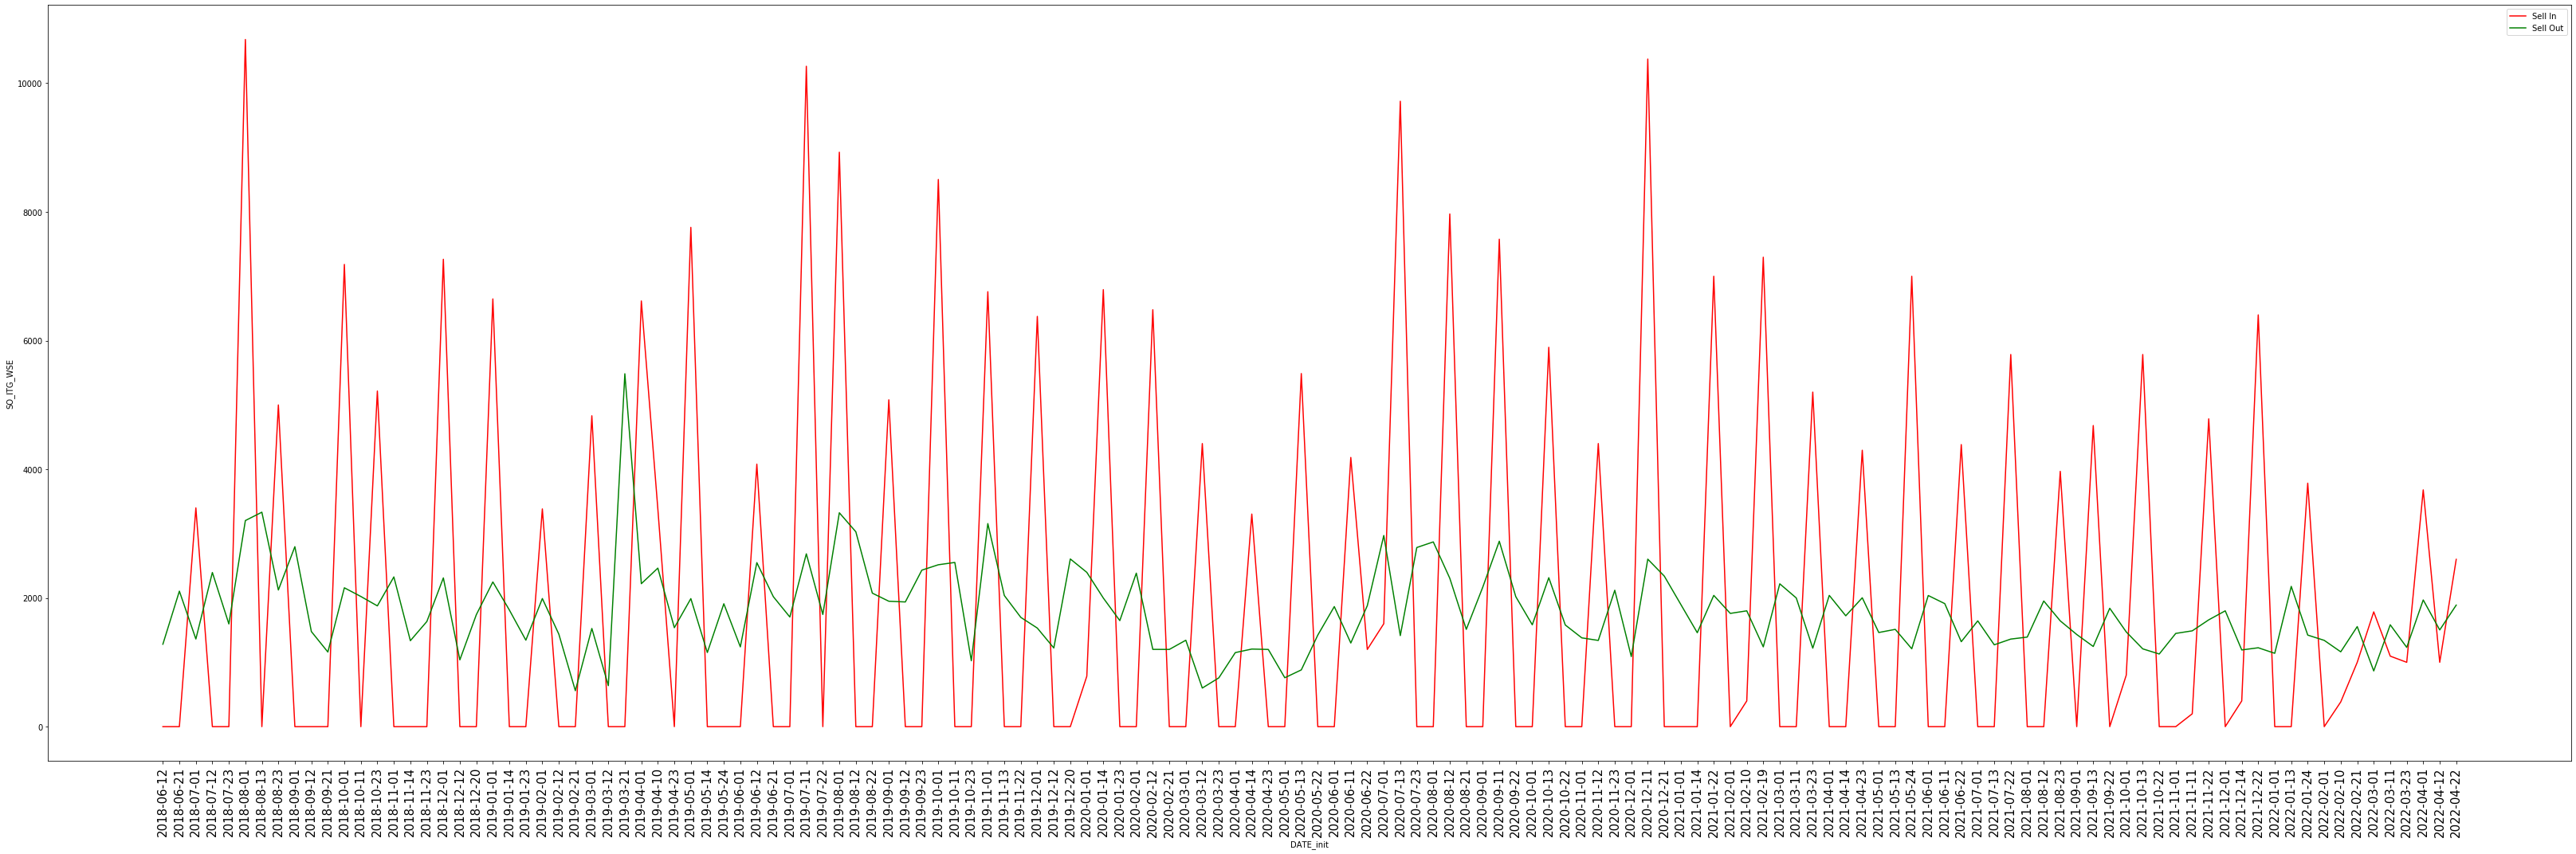

In [35]:
Y=df['SI_ITG_WSE']
Z=df['SO_ITG_WSE']

# Seaborn
plt.figure(figsize=(45,15))
sns.lineplot(x=X, y=Y, color='red', label='Sell In')
sns.lineplot(x=X, y=Z, color='green', label='Sell Out')
plt.legend(loc='best')
# Setting Ticks

plt.tick_params(axis='x',labelsize=15,rotation=90)
plt.tight_layout()

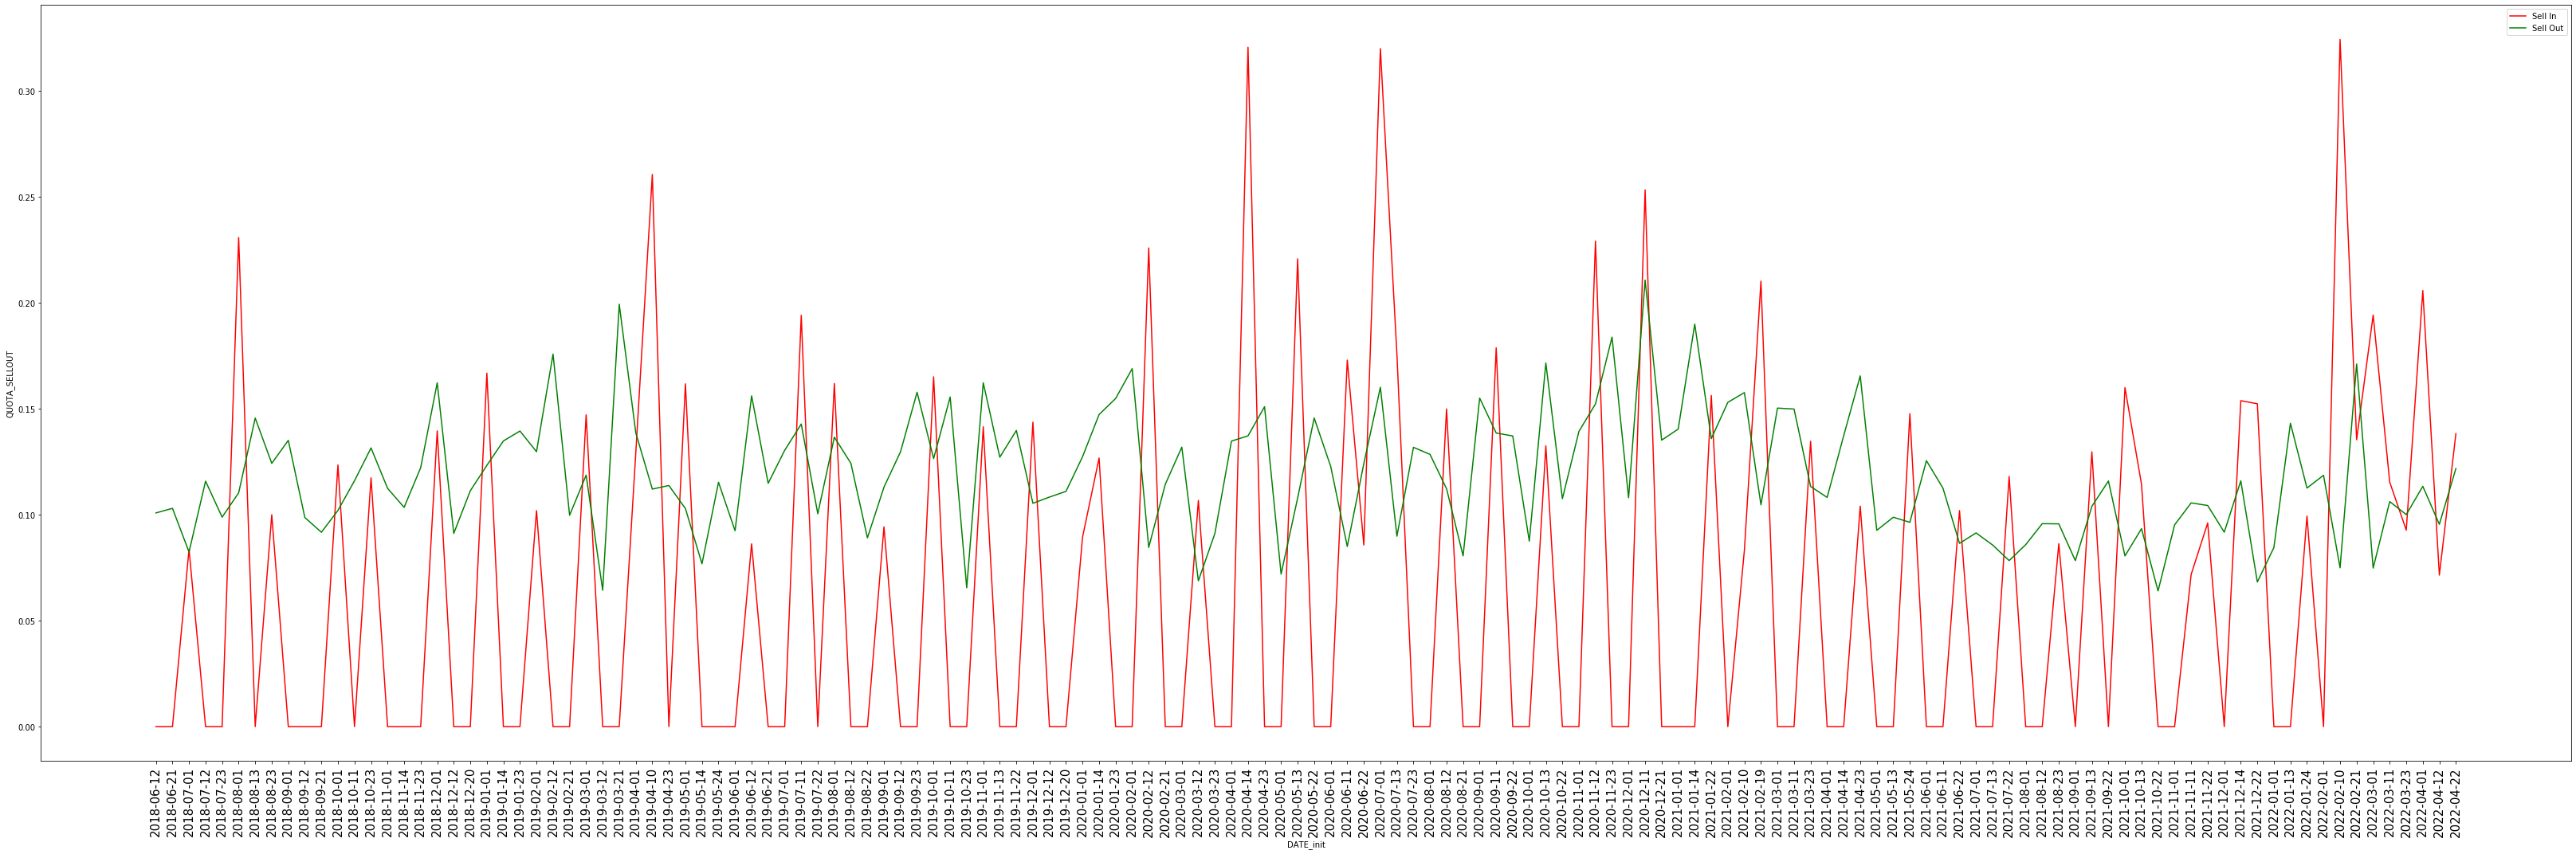

In [36]:
Y=df['QUOTA_SELLIN']
Z=df['QUOTA_SELLOUT']

# Seaborn
plt.figure(figsize=(45,15))
sns.lineplot(x=X, y=Y, color='red', label='Sell In')
sns.lineplot(x=X, y=Z, color='green', label='Sell Out')
plt.legend(loc='best')
# Setting Ticks

plt.tick_params(axis='x',labelsize=15,rotation=90)
plt.tight_layout()